<h1>Advanced Sequence Modeling for Natural Language Processing<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Sequence-to-Sequence-Models,-Encoder-Decoder-Models-and-Conditioned-Generation" data-toc-modified-id="Sequence-to-Sequence-Models,-Encoder-Decoder-Models-and-Conditioned-Generation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sequence-to-Sequence Models, Encoder-Decoder Models and Conditioned Generation</a></span></li><li><span><a href="#Capturing-More-from-a-Sequence:-Bidirectional-Recurrent-Models" data-toc-modified-id="Capturing-More-from-a-Sequence:-Bidirectional-Recurrent-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Capturing More from a Sequence: Bidirectional Recurrent Models</a></span></li><li><span><a href="#Capturing-More-from-a-Sequence:-Attention" data-toc-modified-id="Capturing-More-from-a-Sequence:-Attention-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Capturing More from a Sequence: Attention</a></span><ul class="toc-item"><li><span><a href="#Attention-in-Deep-Neural-Networks" data-toc-modified-id="Attention-in-Deep-Neural-Networks-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Attention in Deep Neural Networks</a></span></li></ul></li><li><span><a href="#Evaluating-Sequence-Generation-Models" data-toc-modified-id="Evaluating-Sequence-Generation-Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluating Sequence Generation Models</a></span></li><li><span><a href="#Example:-Neural-Machine-Translation" data-toc-modified-id="Example:-Neural-Machine-Translation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Example: Neural Machine Translation</a></span><ul class="toc-item"><li><span><a href="#Vocabulary,-Vectorizer-and-Dataset" data-toc-modified-id="Vocabulary,-Vectorizer-and-Dataset-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Vocabulary, Vectorizer and Dataset</a></span></li><li><span><a href="#NMT-Model-with-No-Sampling" data-toc-modified-id="NMT-Model-with-No-Sampling-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>NMT Model with No Sampling</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li></ul></div>

## Introduction

- _Sequence-to-sequence Modeling_ refers to taking sequence as input and producing another sequence as an output of possibly different length
- Examples
    - Predict response for a given email
    - Translate text
    - Summarize the given text

## Sequence-to-Sequence Models, Encoder-Decoder Models and Conditioned Generation

- **Sequence-to-Sequence(S2S)** models are a special case of general family of models alled _encoder-decoder models_
- Encoder-Decoder model is a composition of two models -> an Encoder and a Decoder that are trained jointly.
    - Encoder Model takes an input and produces an encoding or a representation $(\phi)$ of the input which is usually a vector. The goal of the encoder is to capture important properties of the input with respect to the task at hand.
    - The goal of the decoder is to take the encoded input and produce a desired output.
- So S2S models can be defined as encoder-decoder models in which the encoder and decoder are sequence models and the inputs and outputs are both sequences possibly of different lengths.

![Figure 8.1](../images/figure_8_1.png)

**Encoder-Decoder Models as Special Case of Conditioned Generation Models**

- In Conditioned generation, instead of the input respresentation $\phi$, a general conditioning context $c$ influences a decoder to produce an output.
- When the conditioning context $c$ comes from an encoder model, conditioned generation is same as an encoder-decoder model.
- Not all conditioned generation models are encoder-decoder models, because it is possible for the conditioning context to be derived from a structured source.
- For example, in weather report generation, the value of the temperature, humidity and wind speed and direction could condition a decoder to generate the textual weather report.

![Figure 8.2](../images/figure_8_2.png)
![Figure 8.3](../images/figure_8_3.png)
![Figure 8.4](../images/figure_8_4.png)

## Capturing More from a Sequence: Bidirectional Recurrent Models

- The goal of bidirectional recurrent model is to combine the information from past and future to robustly represent the meaning of a word in a sequence.
- Any model in the recurrent family, such as Elmann RNNs, LSTMs or GRUs could be used in such a bidirectional formulation.
- Bidirectional models like unidirectional models can be used in both classification and sequence labeling settings.

![Figure 8.5](../images/figure_8_5.png)
![Figure 8.6](../images/figure_8_6.png)

## Capturing More from a Sequence: Attention

**Problems with S2S, encoder-decoder and conditioned generation models**

- These models crams(encodes) the entire input sentence into a single vector $\phi$ and uses that encoding to generate the output. This might work for very short sentences but will fail to capture the information in the entire input in case of ling sentences. This is a limitation of using just the final hidden state as the encoding.
- Gradients vanishing problem can also happen during back prooagation throigh time which makes the training difficult.

![Figure 8.7](../images/figure_8_7.png)

- **Attention** is the phenomenon in which our minds focus on the relevant parts of the input while producing output.
- **Attention mechanism** is the process in which sequence generation models incorporate attention to different parts of the input and not just the final summary of the input.
- The first models to incorporate the notion of attention for NLP were machine translation models by Bahdanau(2015).

![Figure 8.8](../images/figure_8_8.png)

### Attention in Deep Neural Networks

- In typical S2S Model, each time step produces a hidden state representation, denoted as $\phi_w$, specific to that time step in the encoder.
- To incorporate attention, we consider not only the final hidden state of the encoder but also the hidden states for each of the intermediate steps. These encoder hidden states are uninformatively called _values_.
- Attention also depends on the previous hidden state of the decoder called the _query_. The query vector for time step $t=0$ is a fixed hyperparameter.
- Attention is represented by a vector with the same dimension as the number of values it is attending to. This is called _attention vector_, or _attention weights_ or sometimes _alignment_.
- The attention weights are combined with the encoder states(values) to generate a _context vector_ that sometimes also known as a _glimpse_. This context vector becomes the input for the decoder instead of the full sentence encoding.
- The attention vector for the next time step is updated using a _compatibility function_. The exact nature of the compatibility function depends on the attention mechanism being used.

![Figure 8.9](../images/figure_8_9.png)

**Ways to Implement Attention**
- Simplest and most common is **Content-aware Mechanism**.
- Another popular attention is **Location-aware Attention** which depends only on query vector and the key.
- Attention weights are typically floating-point values between 0 and 1. This is called **Soft Attention**.
- It is also possible to learn a binary 0/1 vector for attention which is called **Hard Attention**.
- When the encoder depends on the states for all the time step in the input, this is known as **Global Attention**.
- In **Local Attention**, attention mechanism only depends on a window of the input around the current time step.
- When multiple attention vector are used to track different regions of input such mechanism is known as **Multiheaded Attention** which is based on Vaswani(2017) work. This popularized the concept of **Self Attention** a mechanizm where the model learns which regions of the input influence one another.
- When the input is multimodal like both image and speech, it is possible to design a **Multimodal Attention Mechanism**

## Evaluating Sequence Generation Models

Sequence Models are evaluated against an expected output called **Reference Output**.

There are two kinds of evaluation for sequence generation models:

- Human Evaluation
- Automation Evaluation
    - n-gram overlap based metrics -> BLEU, ROUGE, METEOR
    - Perplexity

## Example: Neural Machine Translation

In [1]:
%load_ext nb_black

import os
from argparse import Namespace
from collections import Counter
import json
import re
import string

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.utils.data import Dataset, DataLoader
from tqdm import notebook

import utils

<IPython.core.display.Javascript object>

### Vocabulary, Vectorizer and Dataset

In [2]:
class Vocabulary(object):
    def __init__(self, token_to_idx=None):
        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx
        self._idx_to_token = {idk: token for token, idx in self._token_to_idx.items()}

    def to_serializable(self):
        return {"token_to_idx": self._token_to_idx}

    @classmethod
    def from_serializable(cls, contents):
        return cls(**contents)

    def add_token(self, token):
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index

    def add_many(self, tokens):
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        return self._token_to_idx[token]

    def lookup_index(self, index):
        if index not in self._idx_to_token:
            raise KeyError(f"The index {index} is not in the Vocab.")
        return self._idx_to_token[index]

    def __str__(self):
        return f"<Vocabulary(size={len(self)})>"

    def __len__(self):
        return len(self._token_to_idx)

<IPython.core.display.Javascript object>

In [3]:
class SequenceVocabulary(Vocabulary):
    def __init__(
        self,
        token_to_idx=None,
        unk_token="<UNK>",
        mask_token="<MASK>",
        begin_seq_token="<BEGIN>",
        end_seq_token="<END>",
    ):
        super(SequenceVocabulary, self).__init__(token_to_idx)
        self._mask_token = mask_token
        self._unk_token = unk_token
        self._begin_seq_token = begin_seq_token
        self._end_seq_token = end_seq_token

        self.mask_index = self.add_token(self._mask_token)
        self.unk_index = self.add_token(self._unk_token)
        self.begin_seq_index = self.add_token(self._begin_seq_token)
        self.end_seq_index = self.add_token(self._end_seq_token)

    def to_serializable(self):
        contents = super(SequenceVocabulary, self).to_serializable()
        contents.update(
            {
                "unk_token": self._unk_token,
                "mask_token": self._mask_token,
                "begin_seq_token": self._begin_seq_token,
                "end_seq_token": self._end_seq_token,
            }
        )
        return contents

    def lookup_token(self, token):
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

<IPython.core.display.Javascript object>

In [4]:
class NMTVectorizer(object):
    def __init__(
        self, source_vocab, target_vocab, max_source_length, max_target_length
    ):
        self.source_vocab = source_vocab
        self.target_vocab = target_vocab

        self.max_source_length = max_source_length
        self.max_target_length = max_target_length

    def _vectorize(self, indices, vector_length=-1, mask_index=0):
        if vector_length < 0:
            vector_length = len(indices)
        vector = np.zeros(vector_length, dtype=np.int64)
        vector[: len(indices)] = indices
        vector[len(indices) :] = mask_index
        return vector

    def _get_source_indices(self, text):
        indices = [self.source_vocab.begin_seq_index]
        indices.extend(
            self.source_vocab.lookup_token(token) for token in text.split(" ")
        )
        indices.append(self.source_vocab.end_seq_index)
        return indices

    def _get_target_indices(self, text):
        indices = [self.target_vocab.lookup_token(token) for token in text.split(" ")]
        x_indices = [self.target_vocab.begin_seq_index] + indices
        y_indices = indices + [self.target_vocab.end_seq_index]
        return x_indices, y_indices

    def vectorize(self, source_text, target_text, use_dataset_max_lengths=True):
        source_vector_length, target_vector_length = -1, -1
        if use_dataset_max_lengths:
            source_vector_length = self.max_source_length + 2
            target_vector_length = self.max_target_length + 1

        source_indices = self._get_source_indices(source_text)
        source_vector = self._vectorize(
            source_indices,
            vector_length=source_vector_length,
            mask_index=self.source_vocab.mask_index,
        )

        target_x_indices, target_y_indices = self._get_target_indices(target_text)
        target_x_vector = self._vectorize(
            target_x_indices,
            vector_length=target_vector_length,
            mask_index=self.target_vocab.mask_index,
        )

        target_y_vector = self._vectorize(
            target_y_indices,
            vector_length=target_vector_length,
            mask_index=self.target_vocab.mask_index,
        )
        return {
            "source_vector": source_vector,
            "target_x_vector": target_x_vector,
            "target_y_vector": target_y_vector,
            "source_length": len(source_indices),
        }

    @classmethod
    def from_dataframe(cls, bitext_df):
        source_vocab = SequenceVocabulary()
        target_vocab = SequenceVocabulary()

        max_source_length, max_target_length = 0, 0

        for _, row in bitext_df.iterrows():
            source_tokens = row["source_language"].split(" ")
            if len(source_tokens) > max_source_length:
                max_source_length = len(source_tokens)
            for token in source_tokens:
                source_vocab.add_token(token)

            target_tokens = row["target_language"].split(" ")
            if len(target_tokens) > max_target_length:
                max_target_length = len(target_tokens)
            for token in target_tokens:
                target_vocab.add_token(token)
        return cls(source_vocab, target_vocab, max_source_length, max_target_length)

    @classmethod
    def from_serializable(cls, contents):
        source_vocab = SequenceVocabulary.from_serializable(contents["source_vocab"])
        target_vocab = SequenceVocabulary.from_serializable(contents["target_vocab"])
        return cls(
            source_vocab=source_vocab,
            target_vocab=target_vocab,
            max_source_length=contents["max_source_length"],
            max_target_length=contents["max_target_length"],
        )

    def to_serializable(self):
        return {
            "source_vocab": self.source_vocab.to_serializable(),
            "target_vocab": self.target_vocab.to_serializable(),
            "max_source_length": self.max_source_length,
            "max_target_length": self.max_target_length,
        }

<IPython.core.display.Javascript object>

In [5]:
class NMTDataset(Dataset):
    def __init__(self, text_df, vectorizer):
        self.text_df = text_df
        self._vectorizer = vectorizer

        self.train_df = self.text_df[self.text_df.split == "train"]
        self.train_size = len(self.train_df)

        self.val_df = self.text_df[self.text_df.split == "val"]
        self.val_size = len(self.val_df)

        self.test_df = self.text_df[self.text_df.split == "test"]
        self.test_size = len(self.test_df)

        self._lookup_dict = {
            "train": (self.train_df, self.train_size),
            "val": (self.val_df, self.val_size),
            "test": (self.test_df, self.test_size),
        }
        self.set_split("train")

    @classmethod
    def load_dataset_and_make_vectorizer(cls, dataset_csv):
        text_df = pd.read_csv(dataset_csv)
        train_subset = text_df[text_df.split == "train"]
        return cls(text_df, NMTVectorizer.from_dataframe(train_subset))

    @classmethod
    def load_dataset_and_load_vectorizer(cls, dataset_csv, vectorizer_filepath):
        text_df = pd.read_csv(dataset_csv)
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(text_df, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        with open(vectorizer_filepath) as fp:
            return NMTVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        return self._vectorizer

    def set_split(self, split="train"):
        self._train_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        row = self._target_df.iloc[index]
        vector_dict = self._vectorizer.vectorize(
            row.source_language, row.target_language
        )
        return {
            "x_source": vector_dict["source_vector"],
            "x_target": vector_dict["target_x_vector"],
            "y_target": vector_dict["target_y_vector"],
            "x_source_length": vector_dict["source_length"],
        }

    def get_num_batches(self, batch_size):
        return len(self) // batch_size

<IPython.core.display.Javascript object>

In [6]:
def generate_nmt_batches(
    dataset, batch_size, shuffle=True, drop_last=True, device="cpu"
):
    dataloader = DataLoader(
        dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last
    )
    for data_dict in dataloader:
        lengths = data_dict["x_source_length"].numpy()
        sorted_length_indices = lengths.argsort()[::-1].tolist()

        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name][sorted_length_indices].to(device)
        yield out_data_dict

<IPython.core.display.Javascript object>

### NMT Model with No Sampling

Components:

1. NMTEncoder
    - accepts as input a source sequence to be embedded and fed through a bi-directional GRU
2. NMTDecoder
    - using the encoder state and attention, the decoder generates a new sequence
    - the ground truth target sequence is used as input to the decoder at each time step
    - an alternative formulation would allow some of the decoder's own choices to be used as input
    - this is referred to as curriculum learning, learning to search
        - TODO: Look up references for this. I believe Bengio has a paper from the image captioning competitions. Hal Daume has tons on this and is the main NLP guy for it.
3. NMTModel
    - Combines the encoder and decoder into a single class.

In [7]:
def verbose_attention(encoder_state_vectors, query_vector):
    batch_size, num_vectors, vector_size = encoder_state_vectors.size()
    vector_scores = torch.sum(
        encoder_state_vectors * query_vector.view(batch_size, 1, vector_size), dim=2
    )
    vector_probabilities = F.softmax(vector_scores, dim=1)
    weighted_vectors = encoder_state_vectors * vector_probabilities.view(
        batch_size, num_vectors, 1
    )
    context_vectors = torch.sum(weighted_vectors, dim=1)
    return context_vectors, vector_probabilities, vector_scores


def terse_attention(encoder_state_vectors, query_vector):
    vector_scores = torch.matmul(
        encoder_state_vectors, query_vector.unsqueeze(dim=2)
    ).squeeze()
    vector_probabilities = F.softmax(vector_scores, dim=-1)
    context_vectors = torch.matmul(
        encoder_state_vectors.transpose(-2, -1), vector_probabilities.unsqueeze(dim=2)
    ).squeeze()
    return context_vectors, vector_probabilities

<IPython.core.display.Javascript object>

In [8]:
class NMTEncoder(nn.Module):
    def __init__(self, num_embeddings, embedding_size, rnn_hidden_size):
        """
        Args:
            num_embeddings (int): number of embeddings is the size of source vocabulary
            embedding_size (int): size of the embedding vectors
            rnn_hidden_size (int): size of the RNN hidden state vectors
        """
        super(NMTEncoder, self).__init__()

        self.source_embedding = nn.Embedding(
            num_embeddings, embedding_size, padding_idx=0
        )
        self.birnn = nn.GRU(
            embedding_size, rnn_hidden_size, bidirectional=True, batch_first=True
        )

    def forward(self, x_source, x_lengths):
        """The forward pass of the model

        Args:
            x_source (torch.Tensor): the input data tensor.
                x_source.shape is (batch, seq_size)
            x_lengths (torch.Tensor): a vector of lengths for each item in the batch
        Returns:
            a tuple: x_unpacked (torch.Tensor), x_birnn_h (torch.Tensor)
                x_unpacked.shape = (batch, seq_size, rnn_hidden_size * 2)
                x_birnn_h.shape = (batch, rnn_hidden_size * 2)
        """
        x_embedded = self.source_embedding(x_source)
        # create PackedSequence; x_packed.data.shape=(number_items, embeddign_size)
        x_packed = pack_padded_sequence(
            x_embedded,
            x_lengths.detach().cpu().numpy(),
            batch_first=True,
            enforce_sorted=False,
        )

        # x_birnn_h.shape = (num_rnn, batch_size, feature_size)
        x_birnn_out, x_birnn_h = self.birnn(x_packed)
        # permute to (batch_size, num_rnn, feature_size)
        x_birnn_h = x_birnn_h.permute(1, 0, 2)

        # flatten features; reshape to (batch_size, num_rnn * feature_size)
        #  (recall: -1 takes the remaining positions,
        #           flattening the two RNN hidden vectors into 1)
        x_birnn_h = x_birnn_h.contiguous().view(x_birnn_h.size(0), -1)

        x_unpacked, _ = pad_packed_sequence(x_birnn_out, batch_first=True)

        return x_unpacked, x_birnn_h

<IPython.core.display.Javascript object>

In [9]:
class NMTDecoder(nn.Module):
    def __init__(self, num_embeddings, embedding_size, rnn_hidden_size, bos_index):
        """
        Args:
            num_embeddings (int): number of embeddings is also the number of
                unique words in target vocabulary
            embedding_size (int): the embedding vector size
            rnn_hidden_size (int): size of the hidden rnn state
            bos_index(int): begin-of-sequence index
        """
        super(NMTDecoder, self).__init__()
        self._rnn_hidden_size = rnn_hidden_size
        self.target_embedding = nn.Embedding(
            num_embeddings=num_embeddings, embedding_dim=embedding_size, padding_idx=0
        )
        self.gru_cell = nn.GRUCell(embedding_size + rnn_hidden_size, rnn_hidden_size)
        self.hidden_map = nn.Linear(rnn_hidden_size, rnn_hidden_size)
        self.classifier = nn.Linear(rnn_hidden_size * 2, num_embeddings)
        self.bos_index = bos_index

    def _init_indices(self, batch_size):
        """return the BEGIN-OF-SEQUENCE index vector"""
        return torch.ones(batch_size, dtype=torch.int64) * self.bos_index

    def _init_context_vectors(self, batch_size):
        """return a zeros vector for initializing the context"""
        return torch.zeros(batch_size, self._rnn_hidden_size)

    def forward(self, encoder_state, initial_hidden_state, target_sequence):
        """The forward pass of the model

        Args:
            encoder_state (torch.Tensor): the output of the NMTEncoder
            initial_hidden_state (torch.Tensor): The last hidden state in the  NMTEncoder
            target_sequence (torch.Tensor): the target text data tensor
        Returns:
            output_vectors (torch.Tensor): prediction vectors at each output step
        """
        # We are making an assumption there: The batch is on first
        # The input is (Batch, Seq)
        # We want to iterate over sequence so we permute it to (S, B)
        target_sequence = target_sequence.permute(1, 0)
        output_sequence_size = target_sequence.size(0)

        # use the provided encoder hidden state as the initial hidden state
        h_t = self.hidden_map(initial_hidden_state)

        batch_size = encoder_state.size(0)
        # initialize context vectors to zeros
        context_vectors = self._init_context_vectors(batch_size)
        # initialize first y_t word as BOS
        y_t_index = self._init_indices(batch_size)

        h_t = h_t.to(encoder_state.device)
        y_t_index = y_t_index.to(encoder_state.device)
        context_vectors = context_vectors.to(encoder_state.device)

        output_vectors = []
        self._cached_p_attn = []
        self._cached_ht = []
        self._cached_decoder_state = encoder_state.cpu().detach().numpy()

        for i in range(output_sequence_size):
            y_t_index = target_sequence[i]

            # Step 1: Embed word and concat with previous context
            y_input_vector = self.target_embedding(y_t_index)
            rnn_input = torch.cat([y_input_vector, context_vectors], dim=1)

            # Step 2: Make a GRU step, getting a new hidden vector
            h_t = self.gru_cell(rnn_input, h_t)
            self._cached_ht.append(h_t.cpu().detach().numpy())

            # Step 3: Use the current hidden to attend to the encoder state
            context_vectors, p_attn, _ = verbose_attention(
                encoder_state_vectors=encoder_state, query_vector=h_t
            )

            # auxillary: cache the attention probabilities for visualization
            self._cached_p_attn.append(p_attn.cpu().detach().numpy())

            # Step 4: Use the current hidden and context vectors to make a prediction to the next word
            prediction_vector = torch.cat((context_vectors, h_t), dim=1)
            score_for_y_t_index = self.classifier(F.dropout(prediction_vector, 0.3))

            # auxillary: collect the prediction scores
            output_vectors.append(score_for_y_t_index)

        output_vectors = torch.stack(output_vectors).permute(1, 0, 2)

        return output_vectors

<IPython.core.display.Javascript object>

In [10]:
class NMTModel(nn.Module):
    """The Neural Machine Translation Model"""

    def __init__(
        self,
        source_vocab_size,
        source_embedding_size,
        target_vocab_size,
        target_embedding_size,
        encoding_size,
        target_bos_index,
    ):
        """
        Args:
            source_vocab_size (int): number of unique words in source language
            source_embedding_size (int): size of the source embedding vectors
            target_vocab_size (int): number of unique words in target language
            target_embedding_size (int): size of the target embedding vectors
            encoding_size (int): the size of the encoder RNN.
        """
        super(NMTModel, self).__init__()
        self.encoder = NMTEncoder(
            num_embeddings=source_vocab_size,
            embedding_size=source_embedding_size,
            rnn_hidden_size=encoding_size,
        )
        decoding_size = encoding_size * 2
        self.decoder = NMTDecoder(
            num_embeddings=target_vocab_size,
            embedding_size=target_embedding_size,
            rnn_hidden_size=decoding_size,
            bos_index=target_bos_index,
        )

    def forward(self, x_source, x_source_lengths, target_sequence):
        """The forward pass of the model

        Args:
            x_source (torch.Tensor): the source text data tensor.
                x_source.shape should be (batch, vectorizer.max_source_length)
            x_source_lengths torch.Tensor): the length of the sequences in x_source
            target_sequence (torch.Tensor): the target text data tensor
        Returns:
            decoded_states (torch.Tensor): prediction vectors at each output step
        """
        encoder_state, final_hidden_states = self.encoder(x_source, x_source_lengths)
        decoded_states = self.decoder(
            encoder_state=encoder_state,
            initial_hidden_state=final_hidden_states,
            target_sequence=target_sequence,
        )
        return decoded_states

<IPython.core.display.Javascript object>

In [11]:
def normalize_sizes(y_pred, y_true):
    if len(y_pred.size()) == 3:
        y_pred = y_pred.contiguous().view(-1, y_pred.size(2))
    if len(y_true.size()) == 2:
        y_true = y_true.contiguous().view(-1)
    return y_pred, y_true


def compute_accuracy(y_pred, y_true, mask_index):
    y_pred, y_true = normalize_sizes(y_pred, y_true)
    _, y_pred_indices = y_pred.max(dim=1)
    correct_indices = torch.eq(y_pred_indices, y_true).float()
    valid_indices = torch.ne(y_true, mask_index).float()
    n_correct = (correct_indices * valid_indices).sum().item()
    n_valid = valid_indices.sum().item()

    return n_correct / n_valid * 100


def sequence_loss(y_pred, y_true, mask_index):
    y_pred, y_true = normalize_sizes(y_pred, y_true)
    return F.cross_entropy(y_pred, y_true, ignore_index=mask_index)

<IPython.core.display.Javascript object>

In [12]:
args = Namespace(
    # Data and path information
    dataset_csv="../data/nmt/simplest_eng_fra.csv",
    vectorizer_file="vectorizer.json",
    model_state_file="model.pth",
    save_dir="models/chapter08/nmt_luong_no_sampling",
    # Model hyper parameter
    source_embedding_size=64,
    target_embedding_size=64,
    encoding_size=64,
    # Training hyper parameter
    num_epochs=100,
    learning_rate=5e-4,
    batch_size=64,
    seed=1337,
    early_stopping_criteria=5,
    # Runtime hyper parameter
    cuda=True,
    catch_keyboard_interrupt=True,
    reload_from_files=False,
    expand_filepaths_to_save_dir=True,
)

if not torch.cuda.is_available():
    args.cuda = False

args.device = torch.device("cuda" if args.cuda else "cpu")

print("Using CUDA: {}".format(args.cuda))


if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir, args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir, args.model_state_file)

# Set seed for reproducibility
utils.set_seed_everywhere(args.seed, args.cuda)

# handle dirs
utils.handle_dirs(args.save_dir)

Using CUDA: False


<IPython.core.display.Javascript object>

In [13]:
dataset = NMTDataset.load_dataset_and_make_vectorizer(args.dataset_csv)
dataset.save_vectorizer(args.vectorizer_file)
vectorizer = dataset.get_vectorizer()
model = NMTModel(
    source_vocab_size=len(vectorizer.source_vocab),
    source_embedding_size=args.source_embedding_size,
    target_vocab_size=len(vectorizer.target_vocab),
    target_embedding_size=args.target_embedding_size,
    encoding_size=args.encoding_size,
    target_bos_index=vectorizer.target_vocab.begin_seq_index,
)
print(model)
model = model.to(args.device)
optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=optimizer, mode="min", factor=0.5, patience=1
)

NMTModel(
  (encoder): NMTEncoder(
    (source_embedding): Embedding(3025, 64, padding_idx=0)
    (birnn): GRU(64, 64, batch_first=True, bidirectional=True)
  )
  (decoder): NMTDecoder(
    (target_embedding): Embedding(4911, 64, padding_idx=0)
    (gru_cell): GRUCell(192, 128)
    (hidden_map): Linear(in_features=128, out_features=128, bias=True)
    (classifier): Linear(in_features=256, out_features=4911, bias=True)
  )
)


<IPython.core.display.Javascript object>

In [14]:
model = model.to(args.device)
mask_index = vectorizer.target_vocab.mask_index
train_state = utils.make_train_state(args)
epoch_bar = notebook.tqdm(desc="Training Routine", total=args.num_epochs, position=0)
dataset.set_split("train")
train_bar = notebook.tqdm(
    desc="split=train",
    total=dataset.get_num_batches(args.batch_size),
    position=1,
    leave=True,
)
dataset.set_split("val")
val_bar = notebook.tqdm(
    desc="split=val",
    total=dataset.get_num_batches(args.batch_size),
    position=1,
    leave=True,
)

for epoch_index in range(args.num_epochs):
    train_state["epoch_index"] = epoch_index
    # Iterate Over Training Dataset
    # Setup: Batch Generator, set loss & acc to 0, set train mode on
    dataset.set_split("train")
    if epoch_index == 0:
        print(
            f"============ Split={dataset._train_split}, Size={len(dataset)} ============"
        )
    batch_generator = generate_nmt_batches(
        dataset, batch_size=args.batch_size, device=args.device
    )
    training_running_loss, training_running_acc = 0.0, 0.0
    model.train()

    for batch_index, batch_dict in enumerate(batch_generator):
        # 5 Step Training Routine

        # Step 1. Zero the Gradients
        optimizer.zero_grad()

        # Step 2. Compute the gradients
        y_pred = model(
            batch_dict["x_source"],
            batch_dict["x_source_length"],
            batch_dict["x_target"],
        )

        # Step 3. Compute the Output
        loss = sequence_loss(y_pred, batch_dict["y_target"], mask_index=mask_index)

        # Step 4. Use loss to produce gradients
        loss.backward()

        # Step 5. Use Optimizer to take gradient step
        optimizer.step()

        # Compute the running loss and accuracy
        loss_batch = loss.item()
        training_running_loss += (loss_batch - training_running_loss) / (
            batch_index + 1
        )
        acc_batch = compute_accuracy(y_pred, batch_dict["y_target"], mask_index)
        training_running_acc += (acc_batch - training_running_acc) / (batch_index + 1)

        # Update the bar
        train_bar.set_postfix(
            loss=training_running_loss, acc=training_running_acc, epoch=epoch_index
        )
        train_bar.update()
    train_state["train_loss"].append(training_running_loss)
    train_state["train_acc"].append(training_running_acc)

    # Iterate Over Val Dataset
    # Setup: Batch Generator, set loss and acc to 0, set eval mode on
    dataset.set_split("val")
    val_running_loss, val_running_acc = 0.0, 0.0
    if len(dataset) > 0:
        if epoch_index == 0:
            print(
                f"============ Split={dataset._train_split}, Size={len(dataset)} ============"
            )
        batch_generator = utils.generate_batches(
            dataset, batch_size=args.batch_size, device=args.device
        )
        model.eval()

        for batch_index, batch_dict in enumerate(batch_generator):
            # Step 1. Compute the Output
            y_pred = model(
                batch_dict["x_source"],
                batch_dict["x_source_length"],
                batch_dict["x_target"],
            )

            # Step 2. Compute the loss
            loss = sequence_loss(y_pred, batch_dict["y_target"], mask_index)
            loss_batch = loss.item()
            val_running_loss += (loss_batch - val_running_loss) / (batch_index + 1)

            # Step 3. Compute the accuracy
            acc_batch = compute_accuracy(y_pred, batch_dict["y_target"], mask_index)
            val_running_acc += (acc_batch - val_running_acc) / (batch_index + 1)
            val_bar.set_postfix(
                loss=val_running_loss, acc=val_running_acc, epoch=epoch_index
            )
            val_bar.update()
        train_state["val_loss"].append(val_running_loss)
        train_state["val_acc"].append(val_running_acc)
        scheduler.step(train_state["val_loss"][-1])
    else:
        if epoch_index == 0:
            print(f"============ Skipping Validation Pass ============")
        train_state["val_loss"].append(val_running_loss)
        train_state["val_acc"].append(val_running_acc)
        scheduler.step(train_state["train_loss"][-1])
    train_state = utils.update_train_state(
        args=args, model=model, train_state=train_state
    )

    train_bar.n, val_bar.n = 0, 0
    epoch_bar.update()

    if train_state["stop_early"]:
        print("Stopping early....")
        break

    if epoch_index % 10 == 0:
        print(
            f"--------------- {epoch_index}th Epoch Stats---------------\n"
            f"Training Loss={training_running_loss}, "
            f"Training Accuracy={training_running_acc}\n"
            f"Validation Loss={val_running_loss}, "
            f"Validation Accuracy={val_running_acc}.\n"
            "------------------------------------------------------------"
        )

Training Routine:   0%|          | 0/100 [00:00<?, ?it/s]

split=train:   0%|          | 0/142 [00:00<?, ?it/s]

split=val:   0%|          | 0/30 [00:00<?, ?it/s]

============ Split=train, Size=9138 ============
============ Split=val, Size=1955 ============
--------------- 0th Epoch Stats---------------
Training Loss=5.142246467966428, Training Accuracy=31.828060422727447
Validation Loss=4.053562482198078, Validation Accuracy=41.74359698957813.
------------------------------------------------------------
--------------- 10th Epoch Stats---------------
Training Loss=2.1405728921084344, Training Accuracy=57.85677331040806
Validation Loss=2.705363154411316, Validation Accuracy=56.411841792220386.
------------------------------------------------------------
--------------- 20th Epoch Stats---------------
Training Loss=1.4635745110646103, Training Accuracy=66.35018309044487
Validation Loss=2.5676170110702516, Validation Accuracy=59.34158479695269.
------------------------------------------------------------
--------------- 30th Epoch Stats---------------
Training Loss=1.2246064627674258, Training Accuracy=70.64503503800213
Validation Loss=2.55461726

<IPython.core.display.Javascript object>

### Evaluation

In [20]:
from nltk.translate import bleu_score
import seaborn as sns
import matplotlib.pyplot as plt

chencherry = bleu_score.SmoothingFunction()

<IPython.core.display.Javascript object>

In [21]:
def sentences_from_indices(indices, vocab, strict=True, return_string=True):
    ignore_indices = set([vocab.mask_index, vocab.begin_seq_index, vocab_end_seq_index])
    out = []
    for index in indices:
        if index == vocab.begin_seq_index and strict:
            continue
        elif index == vocab.end_seq_index and strict:
            break
        else:
            out.append(vocab.lookup_index(index))
    if return_string:
        return " ".join(out)
    else:
        return out


def get_source_sentence(vectorizer, batch_dict, index):
    indices = batch_dict["x_source"][index].cpu().data.numpy()
    vocab = vectorizer.source_vocab
    return sentence_from_indices(indices, vocab)


def get_true_sentence(vectorizer, batch_dict, index):
    return sentence_from_indices(
        batch_dict["y_target"].cpu().data.numpy()[index], vectorizer.target_vocab
    )


def get_sampled_sentence(vectorizer, batch_dict, index):
    y_pred = model(
        x_source=batch_dict["x_source"],
        x_source_lengths=batch_dict["x_source_length"],
        target_sequence=batch_dict["x_target"],
    )
    return sentence_from_indices(
        torch.max(y_pred, dim=2)[1].cpu().data.numpy()[index], vectorizer.target_vocab
    )


def get_all_sentences(vectorizer, batch_dict, index):
    return {
        "source": get_source_sentence(vectorizer, batch_dict, index),
        "truth": get_true_sentence(vectorizer, batch_dict, index),
        "sampled": get_sampled_sentence(vectorizer, batch_dict, index),
    }


def sentence_from_indices(indices, vocab, strict=True, return_string=True):
    ignore_indices = set([vocab.mask_index, vocab.begin_seq_index, vocab.end_seq_index])
    out = []
    for index in indices:
        if index == vocab.begin_seq_index and strict:
            continue
        elif index == vocab.end_seq_index and strict:
            return " ".join(out)
        else:
            out.append(vocab.lookup_index(index))
    return " ".join(out)

<IPython.core.display.Javascript object>

In [24]:
class NMTSampler:
    def __init__(self, vectorizer, model):
        self.vectorizer = vectorizer
        self.model = model

    def apply_to_batch(self, batch_dict):
        self._last_batch = batch_dict
        y_pred = self.model(
            x_source=batch_dict["x_source"],
            x_source_lengths=batch_dict["x_source_length"],
            target_sequence=batch_dict["x_target"],
        )
        self._last_batch["y_pred"] = y_pred
        attention_batched = np.stack(self.model.decoder._cached_p_attn).transpose(
            1, 0, 2
        )
        self._last_batch["attention"] = attention_batched

    def _get_source_sentence(self, index, return_string=True):
        indices = self._last_batch["x_source"][index].cpu().detach().numpy()
        vocab = self.vectorizer.source_vocab
        return sentence_from_indices(indices, vocab, return_string=return_string)

    def _get_reference_sentence(self, index, return_string=True):
        indices = self._last_batch["y_target"][index].cpu().detach().numpy()
        vocab = self.vectorizer.target_vocab
        return sentence_from_indices(indices, vocab, return_string=return_string)

    def _get_sampled_sentence(self, index, return_string=True):
        _, all_indices = torch.max(self._last_batch["y_pred"], dim=2)
        sentence_indices = all_indices[index].cpu().detach().numpy()
        vocab = self.vectorizer.target_vocab
        return sentence_from_indices(
            sentence_indices, vocab, return_string=return_string
        )

    def get_ith_item(self, index, return_string=True):
        output = {
            "source": self._get_source_sentence(index, return_string=return_string),
            "reference": self._get_reference_sentence(
                index, return_string=return_string
            ),
            "sampled": self._get_sampled_sentence(index, return_string=return_string),
            "attention": self._last_batch["attention"][index],
        }
        reference = output["reference"]
        hypothesis = output["sampled"]
        if not return_string:
            reference = " ".join(reference)
            hypothesis = " ".join(hypothesis)
        output["bleu-4"] = bleu_score.sentence_bleu(
            references=[reference],
            hypothesis=hypothesis,
            smoothing_function=chencherry.method1,
        )
        return output

<IPython.core.display.Javascript object>

In [25]:
model = model.eval().to(args.device)
sampler = NMTSampler(vectorizer, model)

dataset.set_split("test")
batch_generator = generate_nmt_batches(
    dataset, batch_size=args.batch_size, device=args.device
)
test_results = []
for batch_dict in batch_generator:
    sampler.apply_to_batch(batch_dict)
    for i in range(args.batch_size):
        test_results.append(sampler.get_ith_item(i, False))

<IPython.core.display.Javascript object>

(0.6097948772678232, 0.6142899197697873)

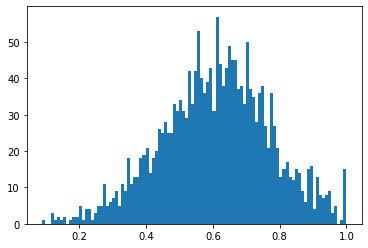

<IPython.core.display.Javascript object>

In [26]:
plt.hist([r["bleu-4"] for r in test_results], bins=100)
np.mean([r["bleu-4"] for r in test_results],), np.median(
    [r["bleu-4"] for r in test_results],
)

In [27]:
dataset.set_split("val")
batch_generator = generate_nmt_batches(
    dataset, batch_size=args.batch_size, device=args.device
)
batch_dict = next(batch_generator)

model = model.eval().to(args.device)
sampler = NMTSampler(vectorizer, model)
sampler.apply_to_batch(batch_dict)

<IPython.core.display.Javascript object>

In [29]:
all_results = []
for i in range(args.batch_size):
    all_results.append(sampler.get_ith_item(i, False))

top_results = [x for x in all_results if x["bleu-4"] > 0.1]
print(len(top_results))

64


<IPython.core.display.Javascript object>

In [34]:
results = get_all_sentences(vectorizer, batch_dict, 1)
results

{'source': "i 'm not flexible enough to sit in the <UNK> position .",
 'truth': "je ne suis pas assez <UNK> pour m'asseoir dans la position du <UNK> .",
 'sampled': 'je ne suis pas sûr bonne de le des la maison . . .'}

<IPython.core.display.Javascript object>

je suis en route pour le visite à la bonne à me écoulé la . 15


ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of ticklabels (15).

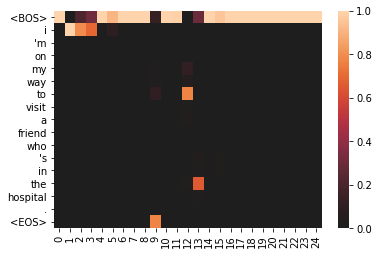

<IPython.core.display.Javascript object>

In [52]:
for sample in top_results:
    plt.figure()
    target_len = len(sample["sampled"])
    source_len = len(sample["source"])

    attention_matrix = sample["attention"][
        :target_len, : source_len + 2
    ].transpose()  # [::-1]
    ax = sns.heatmap(attention_matrix, center=0.0)
    # print(sample["source"])
    ylabs = "<BOS> " + sample["source"] + " <EOS>"
    ax.set_yticks()
    ax.set_yticklabels(ylabs.split(" "), rotation=0)
    print(sample["sampled"], len(sample["sampled"].split(" ")))
    ax.set_xticklabels(sample["sampled"].split(" "), rotation=90)
    ax.set_xlabel("Target Sentence")
    ax.set_ylabel("Source Sentence\n\n")

{'source': "i 'm not flexible enough to sit in the <UNK> position .",
 'truth': "je ne suis pas assez <UNK> pour m'asseoir dans la position du <UNK> .",
 'sampled': 'je ne suis pas sûr du de le du la maison . . .'}

<IPython.core.display.Javascript object>